<ipython-input-19-bff5c61836e2>:114: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


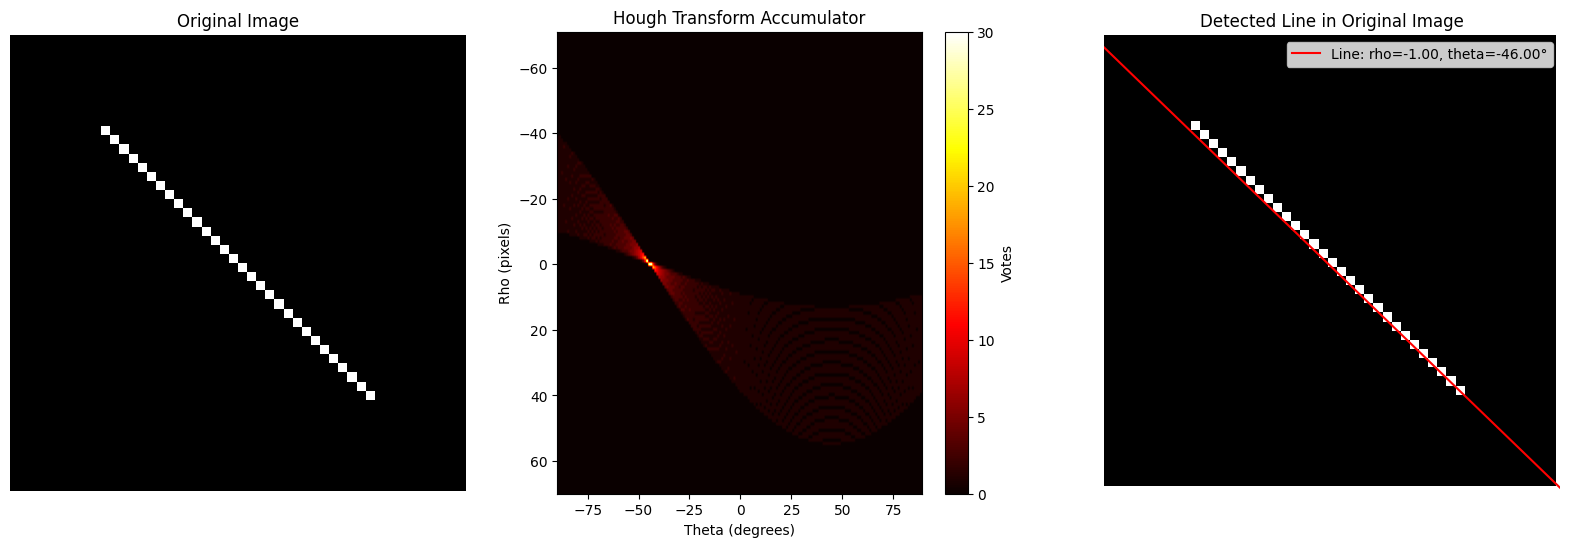

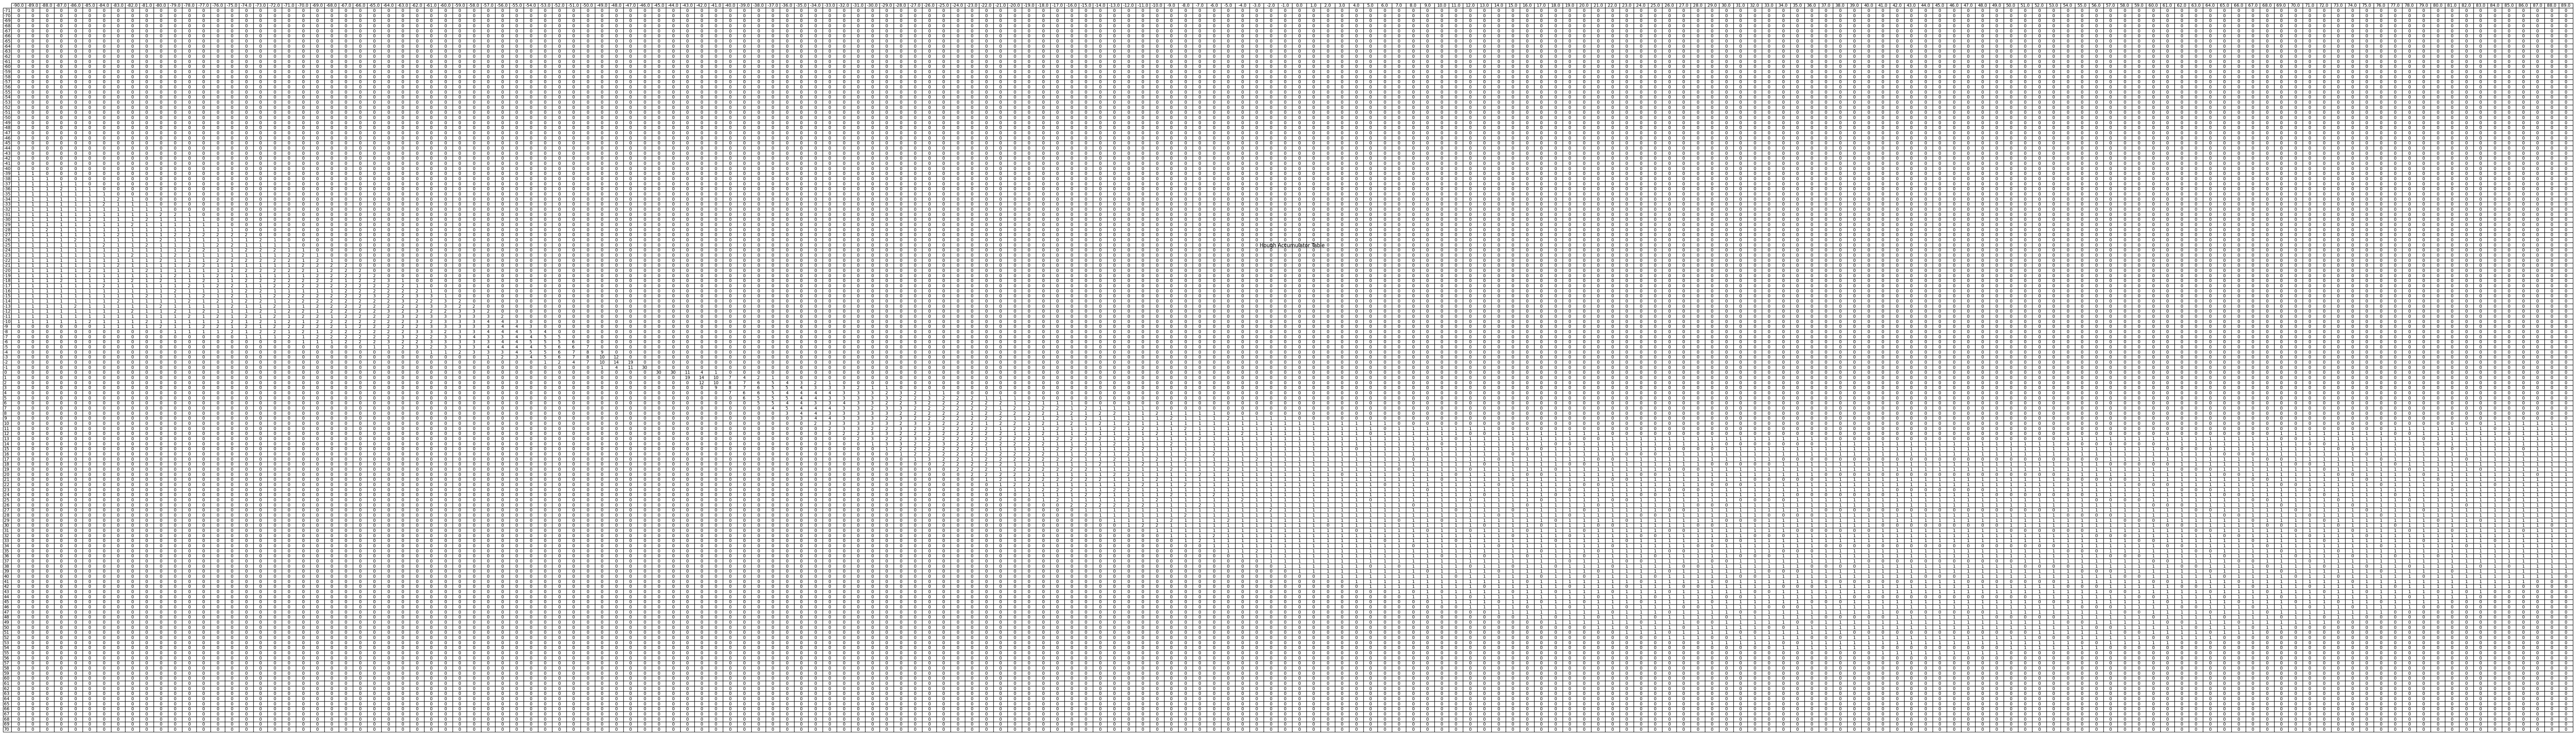

In [19]:
#sarinakasaiyan

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def hough_line(img, rho_resolution=1, theta_resolution=1):
    """
    Perform Hough Transform to detect lines in a binary image.

    Parameters:
    - img: 2D numpy array (binary image) where edge points are non-zero.
    - rho_resolution: Resolution of the rho parameter.
    - theta_resolution: Resolution of the theta parameter.

    Returns:
    - accumulator: 2D array representing the Hough accumulator.
    - thetas: Array of theta values (in radians).
    - rhos: Array of rho values.
    """

    # Define theta values from -90 to 90 degrees
    thetas = np.deg2rad(np.arange(-90.0, 90.0, theta_resolution))
    width, height = img.shape

    # Calculate the maximum possible distance (rho)
    diag_len = int(np.ceil(np.sqrt(width**2 + height**2)))

    # Define rho values based on resolution
    rhos = np.arange(-diag_len, diag_len, rho_resolution)

    # Precompute cos and sin values for theta
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)

    # Initialize the Hough accumulator array
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)

    # Get coordinates of edge points
    y_idxs, x_idxs = np.nonzero(img)

    # Vote in the Hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(len(thetas)):
            # Calculate rho and map it to the accumulator index
            rho = x * cos_t[t_idx] + y * sin_t[t_idx]
            rho_idx = int((rho + diag_len) / rho_resolution)  # Map rho to index based on resolution

            # Increment the accumulator at the corresponding index
            accumulator[rho_idx, t_idx] += 1

    return accumulator, thetas, rhos  # Correctly indented return statement

# Create a synthetic image with a diagonal line pattern
image_size = 50
image = np.zeros((image_size, image_size), dtype=np.uint8)
image[10:40, 10:40] = np.eye(30)  # Draw a diagonal pattern

# Apply Hough Transform
accumulator, thetas, rhos = hough_line(image)

# Set up subplots for visualization
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Display Original Image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Display Hough Space (Accumulator as Image)
im = ax[1].imshow(accumulator, cmap='hot', aspect='auto',
                  extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
ax[1].set_xlabel('Theta (degrees)')
ax[1].set_ylabel('Rho (pixels)')
ax[1].set_title('Hough Transform Accumulator')
fig.colorbar(im, ax=ax[1], label='Votes')

# Find highest peak in accumulator
max_idx = np.unravel_index(np.argmax(accumulator), accumulator.shape)
rho_peak = rhos[max_idx[0]]
theta_peak = thetas[max_idx[1]]

# Draw the line corresponding to the peak in the original image
ax[2].imshow(image, cmap='gray')
x_vals = np.array([0, image.shape[1]])
y_vals = (rho_peak - x_vals * np.cos(theta_peak)) / np.sin(theta_peak) if np.sin(theta_peak) != 0 else None

if y_vals is not None:
    ax[2].plot(x_vals, y_vals, 'r', label=f'Line: rho={rho_peak:.2f}, theta={np.rad2deg(theta_peak):.2f}°')

ax[2].set_xlim([0, image.shape[1]])
ax[2].set_ylim([image.shape[0], 0])
ax[2].set_title("Detected Line in Original Image")
ax[2].legend()
ax[2].axis('off')

# Display Accumulator Table with enhanced formatting
accumulator_df = pd.DataFrame(accumulator, index=np.round(rhos, 2), columns=np.round(np.rad2deg(thetas), 2))
table_fig, table_ax = plt.subplots(figsize=(12, 10))
table_ax.axis('off')
table_ax.table(cellText=accumulator_df.values,
               rowLabels=accumulator_df.index,
               colLabels=accumulator_df.columns,
               cellLoc='center',
               loc='center',
               colWidths=[0.05] * len(thetas))  # Added missing comma here

plt.title("Hough Accumulator Table")

# Show all plots
plt.tight_layout()
plt.show()